# Predicción de sobrevivencia en el Titanic

## 1. Exploratory Data Analysis

1.1. Conexión con Drive

In [13]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.2. Carga de datos

In [14]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

drive_path = "/content/drive/My Drive/usac/master/2024 - trimestre 5/data analysis/activities/titanic/Titanic_data/"

train_df = pd.read_csv(drive_path + "train.csv")
test_df = pd.read_csv(drive_path + "test.csv")
gender_submission_df = pd.read_csv(drive_path + "gender_submission.csv")

1.3. Exploración datos

1.3.1. Train data frame

1.3.1.1. Info

In [15]:
# Variable
# Survived: 0 = No, 1 = Sí
# Pclass: Clase social	1 = 1ra, 2 = 2da, 3 = 3ra
# Sex: Femenino o másculino
# Age: Edad en años
# SibSp: No. hermanos / cónyugues abordo del Titanic
# Parch: No. padres / hijos abordo del Titanic
# Ticket:	Número del boleto
# Fare:	Tarifa en £
# Cabin: Número de cabina
# Embarked: Puerto de embarcación	C = Cherbourg, Q = Queenstown, S = Southampton

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


1.3.1.2. Describe

In [16]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1.3.1.3. Head

In [17]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## 2. Visualization Data Analysis

2.1. Correlación

<Axes: >

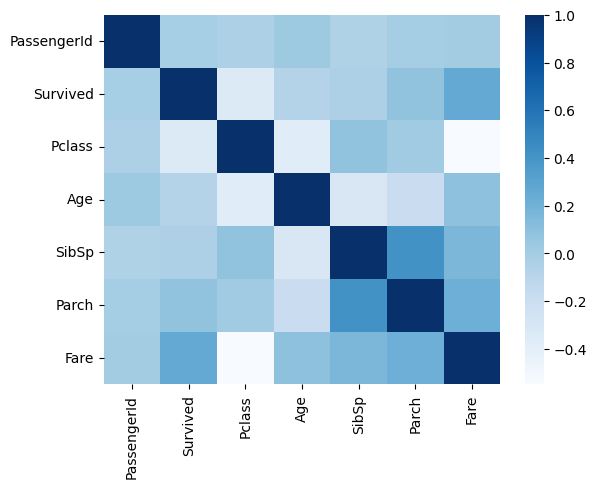

In [47]:
import seaborn as sns

# Veamos si nos faltan datos, ¡afortunadamente no es así!
sns.heatmap(train_df.corr(numeric_only = True), cmap = "Blues")

2.2. Histogramas

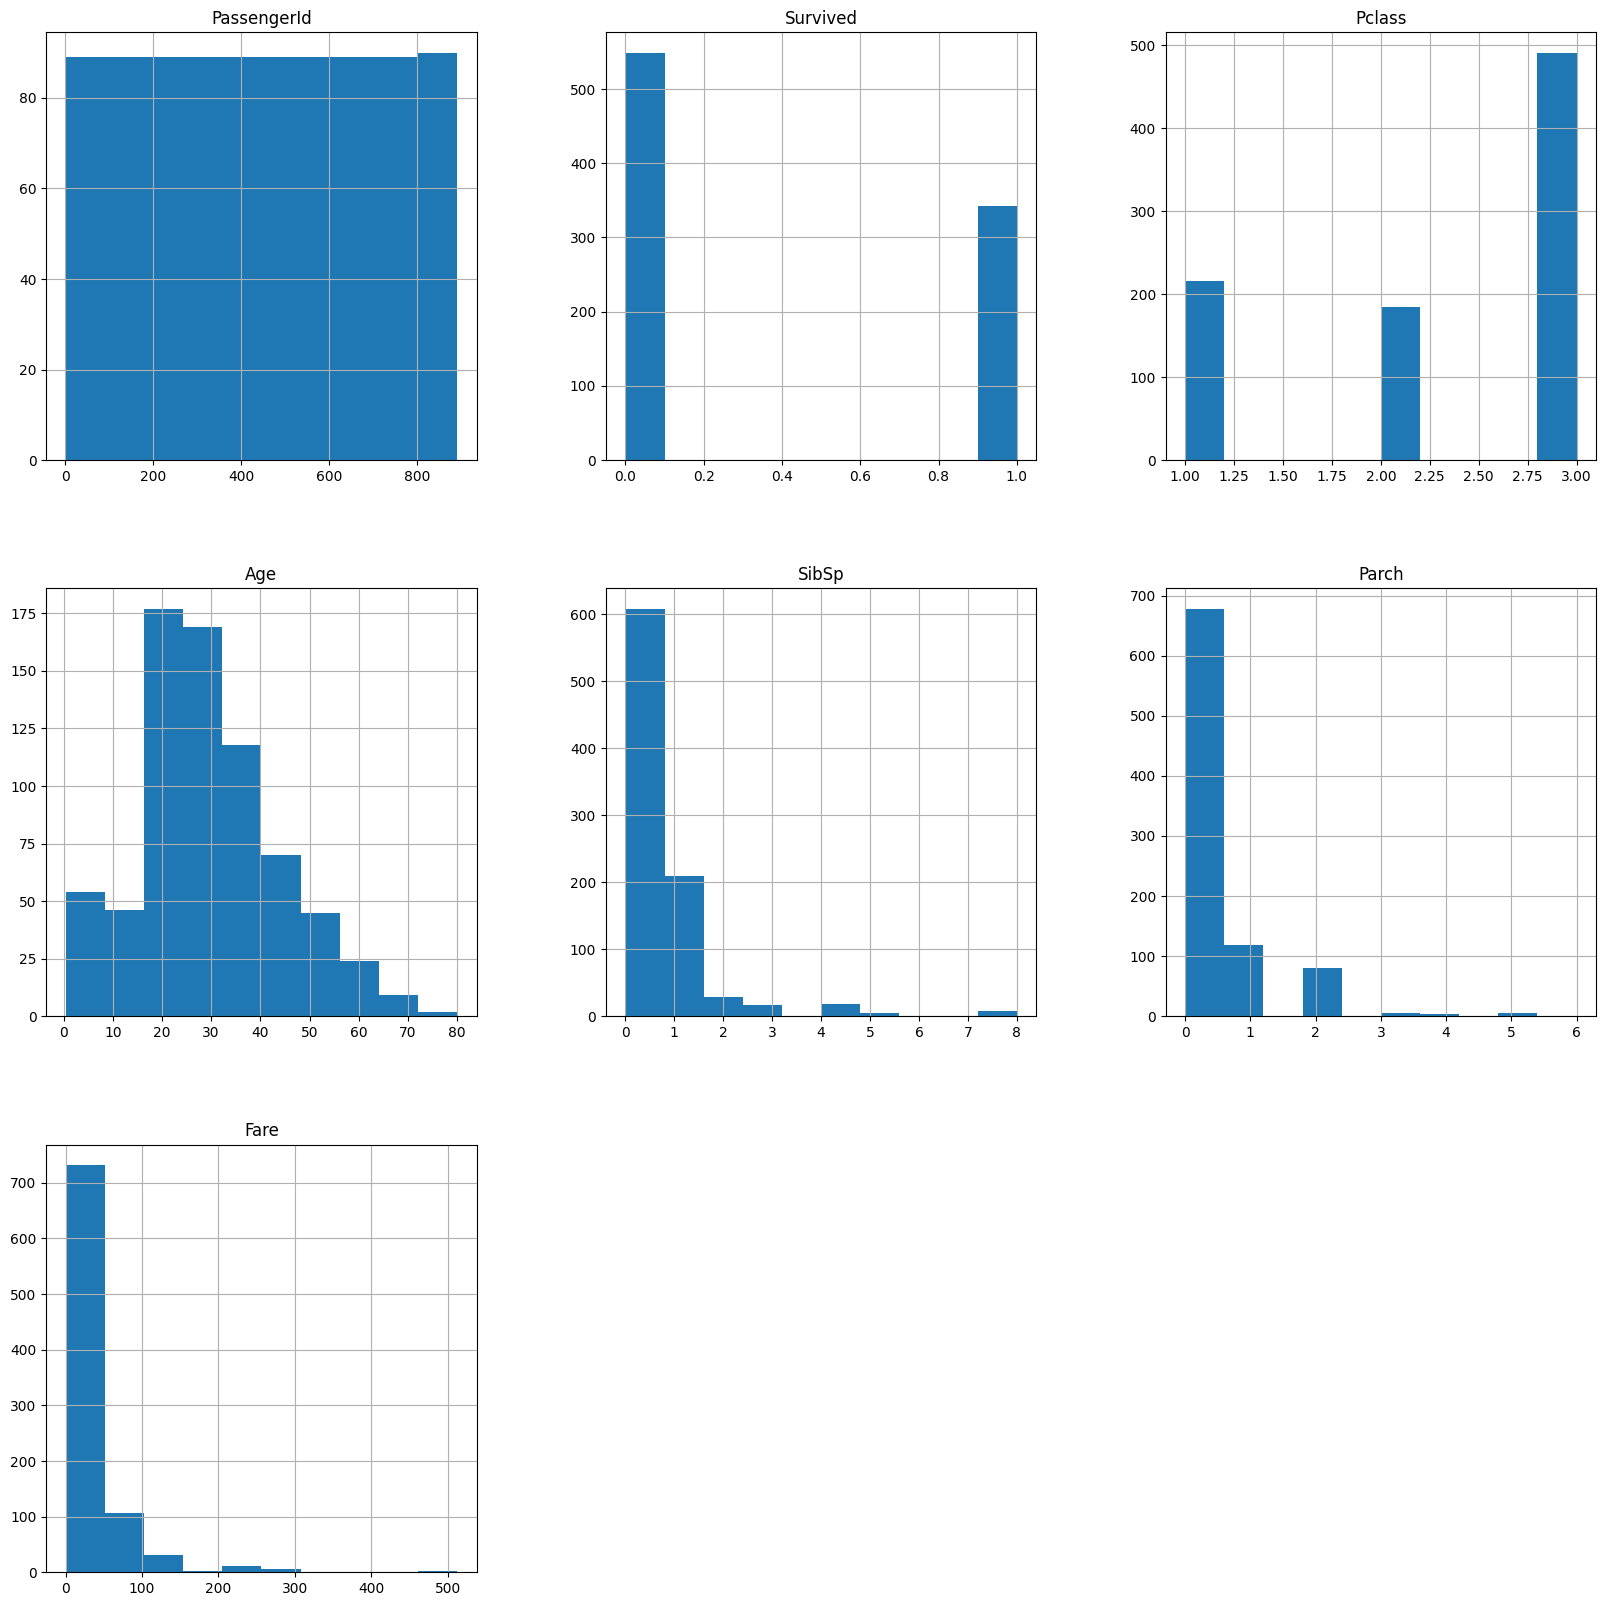

In [26]:
import matplotlib.pyplot as plt

train_df.hist(figsize=(20,20))

plt.show()

2.3. Kernel Density Estimatio

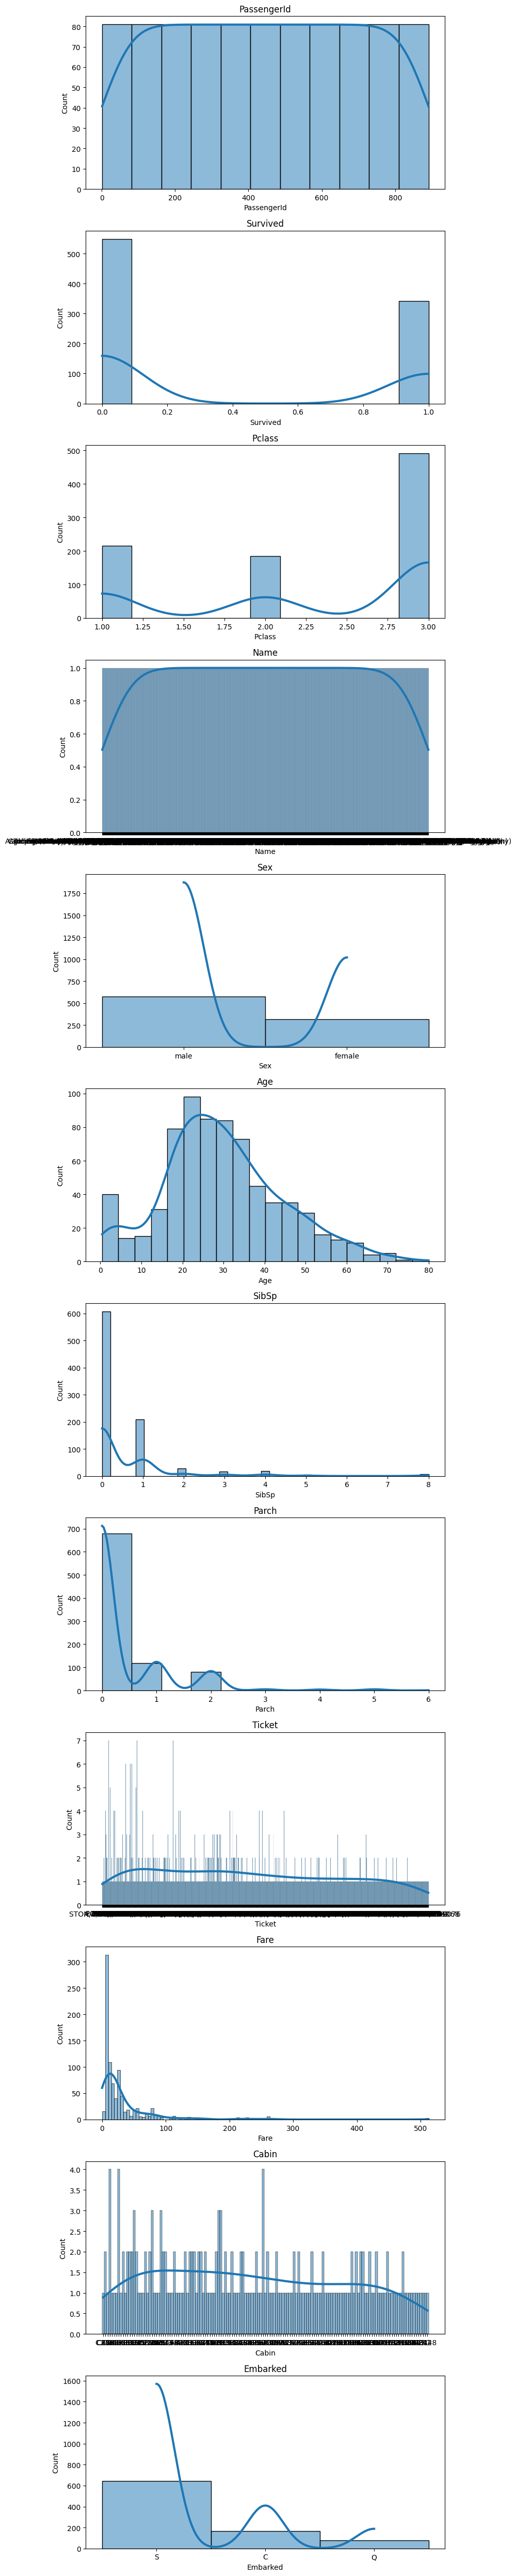

In [49]:
# distplot combina la función matplotlib.hist con la de seaborn kdeplot()
# KDE Plot representa la Kernel Density Estimate
# KDE se utiliza para visualizar la densidad de una probabilidad de una variable continua.
# KDE nos muestra la densidad de una probabilidad para diferentes valores de una variable continua.

n = len(train_df.columns)

plt.figure(figsize = (10, 50))

for i in range(n):
    plt.subplot(n, 1, i + 1)

    sns.histplot(
        train_df[train_df.columns[i]],
        line_kws = {"color": "b", "lw": 3, "label": "KDE"},
        cbar_kws = {"color": "g"}, kde = True
    )

    plt.title(train_df.columns[i])

plt.tight_layout()

<Axes: >

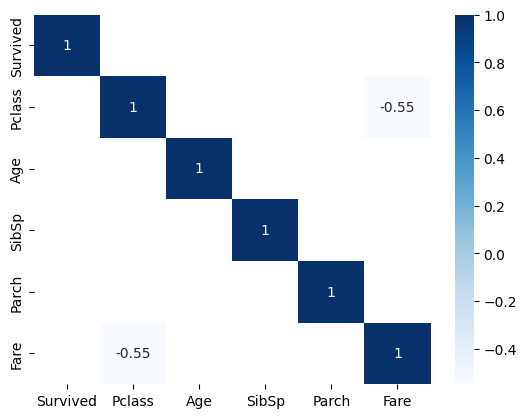

In [35]:
coorlation = train_df.iloc[:,1:].corr(numeric_only=True)
thresh = 0.50
sns.heatmap(coorlation[abs(coorlation) > thresh] , annot=True,cmap='Blues')

# 3. Outlier Analysis

In [71]:
import numpy as np # linear algebra

def Zscore_outlier(df):
    out=[]
    m = np.mean(df)
    sd = np.std(df)

    for i in df:
        z = (i - m) / sd

        if np.abs(z) > 3:
            out.append(i)

    print("Outliers:", out)

In [72]:
Zscore_outlier(train_df['Age'])

Outliers: [80.0, 74.0]


In [73]:
Zscore_outlier(train_df['SibSp'])

Outliers: [4, 4, 5, 4, 5, 4, 8, 4, 4, 8, 4, 8, 4, 4, 4, 4, 8, 5, 5, 4, 4, 5, 4, 4, 8, 4, 4, 8, 4, 8]


In [74]:
Zscore_outlier(train_df['Parch'])

Outliers: [5, 5, 3, 4, 4, 3, 4, 4, 5, 5, 6, 3, 3, 3, 5]


In [75]:
Zscore_outlier(train_df['Fare'])

Outliers: [263.0, 263.0, 247.5208, 512.3292, 247.5208, 262.375, 263.0, 211.5, 227.525, 263.0, 221.7792, 227.525, 512.3292, 211.3375, 227.525, 227.525, 211.3375, 512.3292, 262.375, 211.3375]


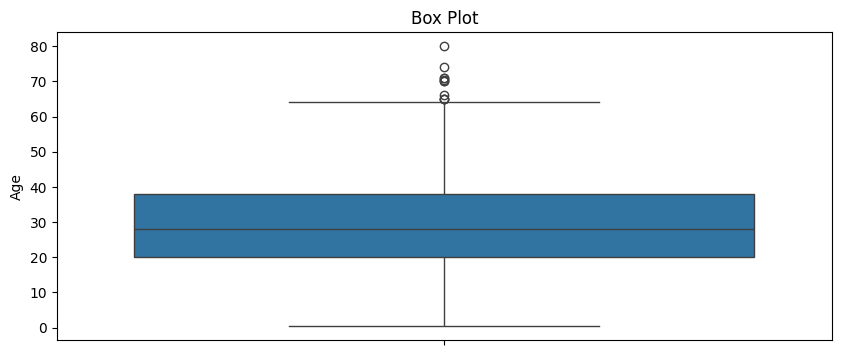

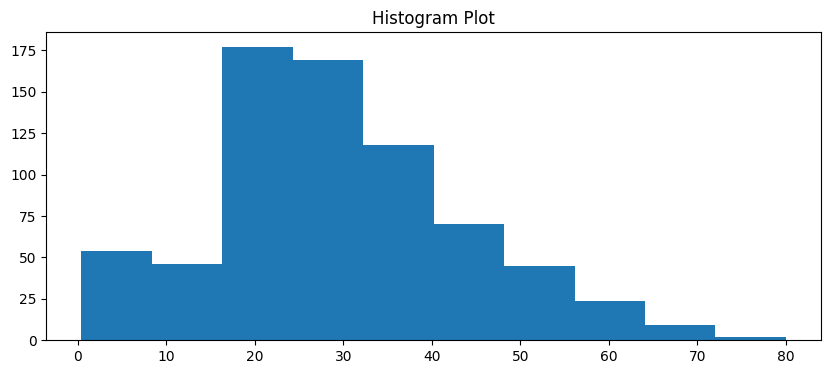

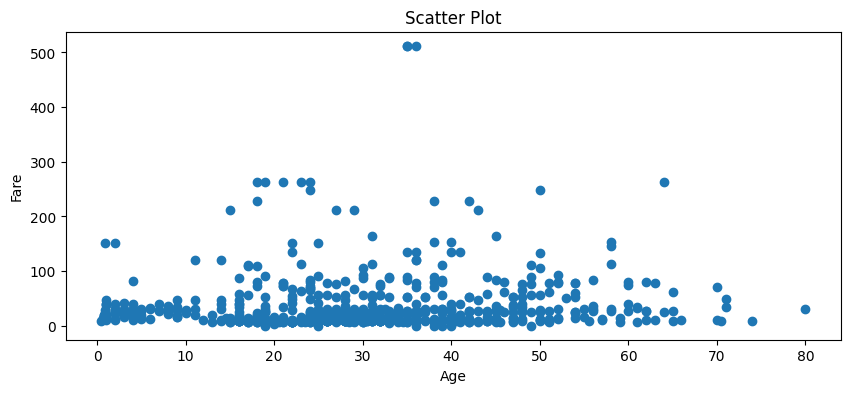

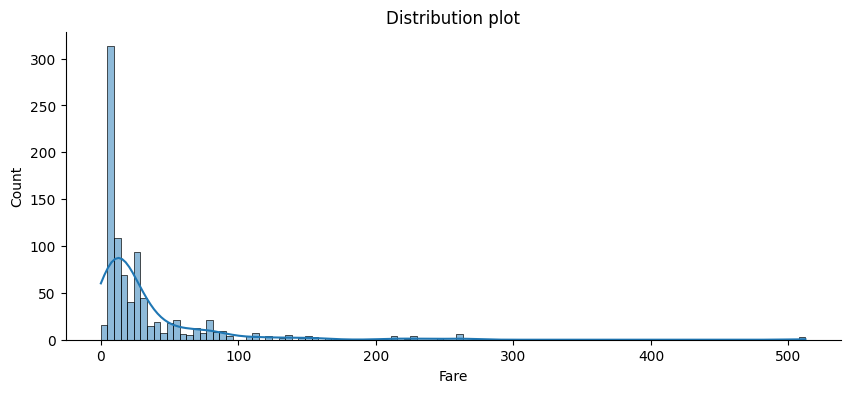

<Figure size 1000x400 with 0 Axes>

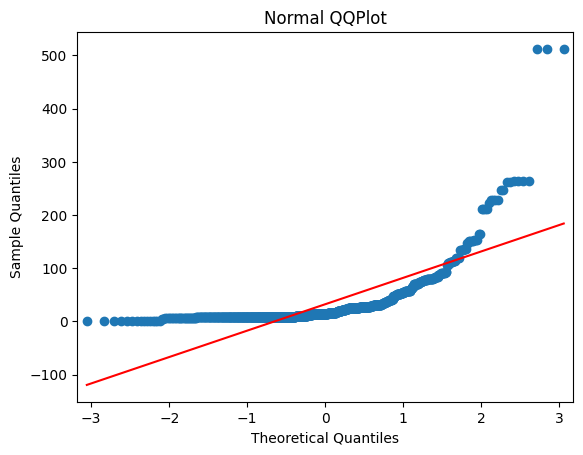

In [78]:
from statsmodels.graphics.gofplots import qqplot

def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()

Box_plots(train_df['Age'])

def hist_plots(df):
    plt.figure(figsize=(10, 4))
    plt.hist(df)
    plt.title("Histogram Plot")
    plt.show()

hist_plots(train_df['Age'])

def scatter_plots(df1,df2):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(df1,df2)
    ax.set_xlabel('Age')
    ax.set_ylabel('Fare')
    plt.title("Scatter Plot")
    plt.show()

scatter_plots(train_df['Age'],train_df['Fare'])

def dist_plots(df):
    plt.figure(figsize=(10, 4))
    sns.histplot(df, kde=True)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()

dist_plots(train_df['Fare'])

def qq_plots(df):
    plt.figure(figsize=(10, 4))
    qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()

qq_plots(train_df['Fare'])

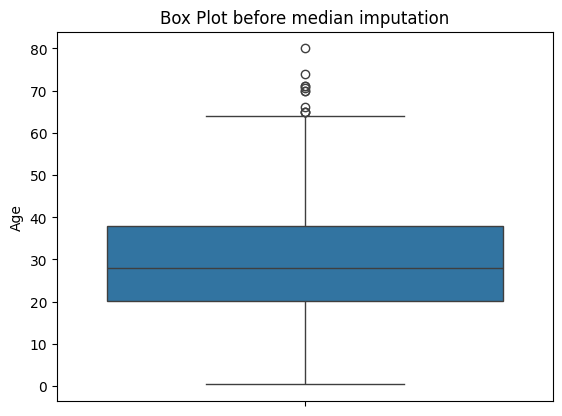

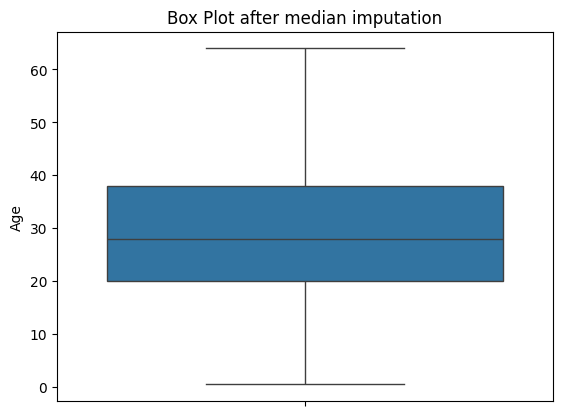

In [79]:
#median imputation
sns.boxplot(train_df['Age'])

plt.title("Box Plot before median imputation")

plt.show()

q1 = train_df['Age'].quantile(0.25)
q3 = train_df['Age'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(train_df['Age'])

for i in train_df['Age']:

    if i > Upper_tail or i < Lower_tail:
            train_df['Age'] = train_df['Age'].replace(i, med)

sns.boxplot(train_df['Age'])
plt.title("Box Plot after median imputation")
plt.show()

# 4. Segmentation Analysis with Passenger Data

4.1. Relación entre clase y tarifa

<Axes: xlabel='Pclass', ylabel='Fare'>

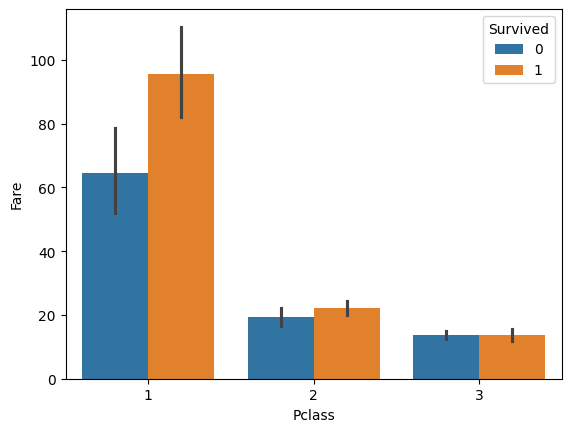

In [38]:
sns.barplot(data=train_df, x="Pclass", y="Fare", hue="Survived")

4.2. Tabla pivote entre edad, tarifa y grupo familiar

In [46]:
pivot_table = pd.pivot_table(train_df, index="Survived", values=["Age", "SibSp", "Parch", "Fare"])

pivot_table

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


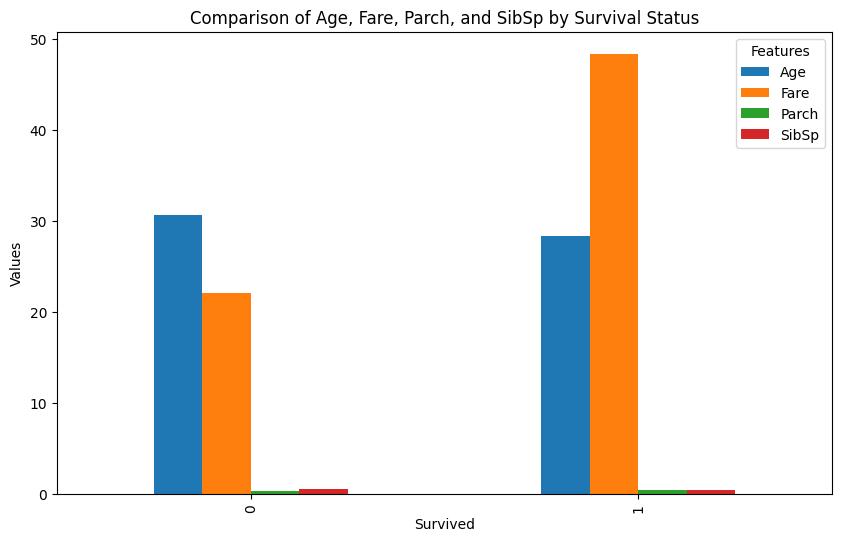

In [45]:
pivot_table.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Survived')
plt.ylabel('Values')
plt.title('Comparison of Age, Fare, Parch, and SibSp by Survival Status')
plt.legend(title='Features')

plt.show()

4.3. Variables numéricas y categóricas

In [ ]:
df_num = train_df[["Age", "SibSp", "Parch", "Fare"]]
df_cat = train_df[["Survived", "Sex", "Cabin", "Embarked", "Ticket"]]

In [81]:
x = pd.DataFrame(
    (
        pd.pivot_table(
            train_df,
            index="Survived",
            columns="Sex",
            values="Ticket",
            aggfunc="count",
        )
    )
)
print()
print(
    pd.pivot_table(
        train_df, index="Survived", columns="Pclass", values="Ticket", aggfunc="count"
    )
)
print()
print(
    pd.pivot_table(
        train_df,
        index="Survived",
        columns="Embarked",
        values="Ticket",
        aggfunc="count",
    )
)
print()
x


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217



Sex,female,male
Survived,,
0,81,468
1,233,109


4.4. Limpieza de datos

In [129]:
train_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [130]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [104]:
train_df_cleaned = train_df.drop(columns=["PassengerId", "Cabin", "Name", "Ticket"])

In [148]:
test_df_cleaned = test_df.drop(columns=["PassengerId", "Cabin", "Name", "Ticket"])

In [105]:
train_df_cleaned["Age"] = train_df["Age"].fillna(train_df["Age"].mean())

In [149]:
test_df_cleaned["Age"] = test_df["Age"].fillna(test_df["Age"].mean())

In [106]:
train_df_cleaned["Embarked"] = train_df["Embarked"].fillna(train_df["Embarked"].mode()[0])

In [150]:
test_df_cleaned["Fare"] = test_df["Fare"].fillna(test_df["Fare"].mean())

In [107]:
train_df_cleaned.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [151]:
test_df_cleaned.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

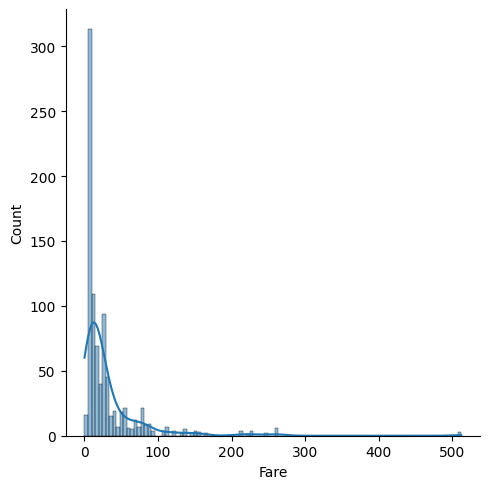

In [108]:
sns.displot(train_df["Fare"], kde=True)

In [138]:
from sklearn.preprocessing import LabelEncoder

cols = ["Sex", "Embarked"]
le = LabelEncoder()

for col in cols:
    train_df_cleaned[col] = le.fit_transform(train_df_cleaned[col])

for col in cols:
    test_df_cleaned[col] = le.fit_transform(test_df_cleaned[col])

train_df_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [156]:
test_df_cleaned.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [110]:
def remove_outliers_zscore(data, column, threshold=3):
    mean = np.mean(data[column])
    std = np.std(data[column])
    data = data[np.abs((data[column] - mean) / std) <= threshold]
    return data

In [111]:
train_df_cleaned = remove_outliers_zscore(train_df_cleaned, 'Age')
train_df_cleaned = remove_outliers_zscore(train_df_cleaned, 'SibSp')
train_df_cleaned = remove_outliers_zscore(train_df_cleaned, 'Parch')
train_df_cleaned = remove_outliers_zscore(train_df_cleaned, 'Fare')

# test_df_cleaned = remove_outliers_zscore(test_df_cleaned, 'Age')
# test_df_cleaned = remove_outliers_zscore(test_df_cleaned, 'SibSp')
# test_df_cleaned = remove_outliers_zscore(test_df_cleaned, 'Parch')
# test_df_cleaned = remove_outliers_zscore(test_df_cleaned, 'Fare')

# Verify data
print(train_df.shape)
print(train_df_cleaned.shape)
print(test_df.shape)
print(test_df_cleaned.shape)

(891, 12)
(827, 8)


In [155]:
print(test_df.shape)
print(test_df_cleaned.shape)

(418, 11)
(418, 7)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


## 5. Prediction who live with 3 different algorithms (with confusion mattrix)

5.1. Definir criterios

In [112]:
X = train_df_cleaned.drop(columns=["Survived"], axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.072077,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


5.2. Variable a predecir

In [113]:
y = train_df_cleaned["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 827, dtype: int64

5.3. Elección de modelos

In [116]:
from sklearn.model_selection import train_test_split, cross_val_score

def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=40
    )
    model.fit(x_train, y_train)
    print("Accuracy", model.score(x_test, y_test))

    score = cross_val_score(model, X, y, cv=5)
    print("CV Score :", np.mean(score))

In [117]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
classify(model)

Accuracy 0.7777777777777778
CV Score : 0.7703322380430814


In [118]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()
classify(model)

[LightGBM] [Info] Number of positive: 237, number of negative: 383
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 172
[LightGBM] [Info] Number of data points in the train set: 620, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382258 -> initscore=-0.479975
[LightGBM] [Info] Start training from score -0.479975
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [119]:
from xgboost import XGBClassifier

model = XGBClassifier()
classify(model)

Accuracy 0.8115942028985508
CV Score : 0.8138006571741512


In [120]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
classify(model)

Accuracy 0.8309178743961353
CV Score : 0.8053596202993794


In [121]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
classify(model)

Accuracy 0.7874396135265701
CV Score : 0.7945089448703906


In [122]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
classify(model)

Accuracy 0.7874396135265701
CV Score : 0.7908287696239504


In [186]:
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 500, activation='relu', input_shape=(7, )))
model.add(tf.keras.layers.Dense(units = 500, activation='relu'))
model.add(tf.keras.layers.Dense(units = 500, activation='relu'))
model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 500)               4000      
                                                                 
 dense_5 (Dense)             (None, 500)               250500    
                                                                 
 dense_6 (Dense)             (None, 500)               250500    
                                                                 
 dense_7 (Dense)             (None, 1)                 501       
                                                                 
Total params: 505501 (1.93 MB)
Trainable params: 505501 (1.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [187]:
model.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics=['accuracy'])

5.4. Extreme Gradient Boosting

In [157]:
model = XGBClassifier()
model.fit(X, y)
pred = model.predict(test_df_cleaned)
pred

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [158]:
gender_submission_df["Survived"] = pred

gender_submission_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [160]:
gender_submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [162]:
gender_submission_df.to_csv("/content/drive/My Drive/usac/master/2024 - trimestre 5/data analysis/activities/titanic/SubmissionXGBClassifier2.csv", index=False)

In [174]:
y_test = gender_submission_df['Survived']
y_test

0      0
1      0
2      1
3      1
4      0
      ..
413    0
414    1
415    0
416    0
417    1
Name: Survived, Length: 418, dtype: int64

In [175]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("Accuracy {} %".format(100 * accuracy_score(pred, y_test)))

Accuracy 100.0 %


In [176]:
cm = confusion_matrix(y_test, pred)

cm

array([[281,   0],
       [  0, 137]])

<Axes: >

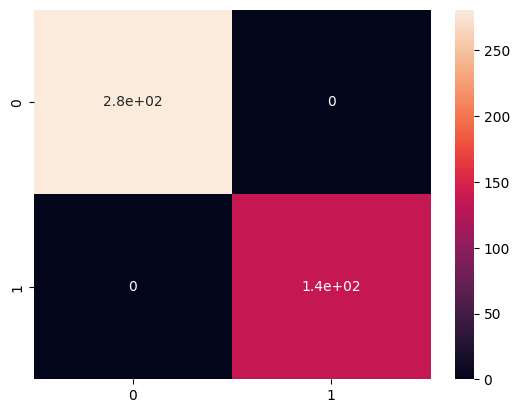

In [171]:
sns.heatmap(cm, annot=True)

In [177]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       281
           1       1.00      1.00      1.00       137

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418



5.5. Random forest

In [179]:
model = RandomForestClassifier()
model.fit(X, y)
pred = model.predict(test_df_cleaned)
pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [180]:
gender_submission_df["Survived"] = pred

gender_submission_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [181]:
gender_submission_df.to_csv("/content/drive/My Drive/usac/master/2024 - trimestre 5/data analysis/activities/titanic/SubmissionRandomForest2.csv", index=False)

In [182]:
print("Accuracy {} %".format(100 * accuracy_score(pred, y_test)))

Accuracy 93.0622009569378 %


In [183]:
cm = confusion_matrix(y_test, pred)

cm

array([[263,  18],
       [ 11, 126]])

<Axes: >

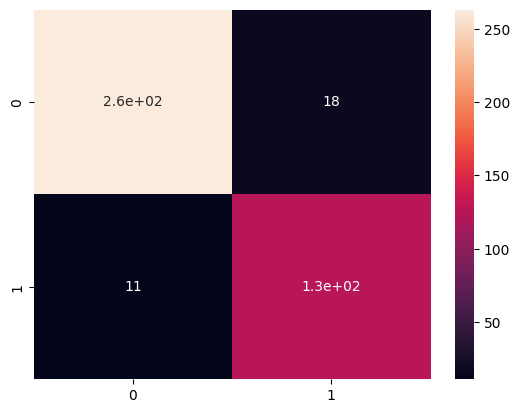

In [184]:
sns.heatmap(cm, annot=True)

In [185]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       281
           1       0.88      0.92      0.90       137

    accuracy                           0.93       418
   macro avg       0.92      0.93      0.92       418
weighted avg       0.93      0.93      0.93       418



5.6. Neural network

In [188]:
model.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [189]:
epochs_hist = model.fit(X, y, epochs = 100, batch_size=50)

Epoch 1/100
17/17 [==============================] - 3s 15ms/step - loss: 0.9437 - accuracy: 0.6457
Epoch 2/100
17/17 [==============================] - 0s 18ms/step - loss: 0.6415 - accuracy: 0.6832
Epoch 3/100
17/17 [==============================] - 0s 19ms/step - loss: 0.5910 - accuracy: 0.6977
Epoch 4/100
17/17 [==============================] - 0s 17ms/step - loss: 0.5884 - accuracy: 0.7062
Epoch 5/100
17/17 [==============================] - 0s 18ms/step - loss: 0.5747 - accuracy: 0.6953
Epoch 6/100
17/17 [==============================] - 0s 17ms/step - loss: 0.5481 - accuracy: 0.7207
Epoch 7/100
17/17 [==============================] - 0s 16ms/step - loss: 0.5711 - accuracy: 0.7013
Epoch 8/100
17/17 [==============================] - 0s 19ms/step - loss: 0.5397 - accuracy: 0.7376
Epoch 9/100
17/17 [==============================] - 0s 17ms/step - loss: 0.5254 - accuracy: 0.7497
Epoch 10/100
17/17 [==============================] - 0s 19ms/step - loss: 0.4957 - accuracy: 0.7751

In [190]:
pred = (model.predict(test_df_cleaned) > 0.5).astype("int32")
pred

14/14 [==============================] - 0s 5ms/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
    

In [191]:
gender_submission_df["Survived"] = pred

gender_submission_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [192]:
gender_submission_df.to_csv("/content/drive/My Drive/usac/master/2024 - trimestre 5/data analysis/activities/titanic/SubmissionNeuralNetwork2.csv", index=False)

In [193]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

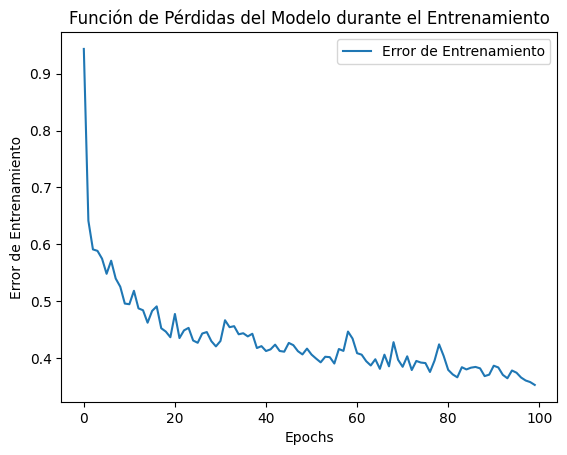

In [194]:
plt.plot(epochs_hist.history['loss'])
plt.title("Función de Pérdidas del Modelo durante el Entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("Error de Entrenamiento")
plt.legend(["Error de Entrenamiento"])

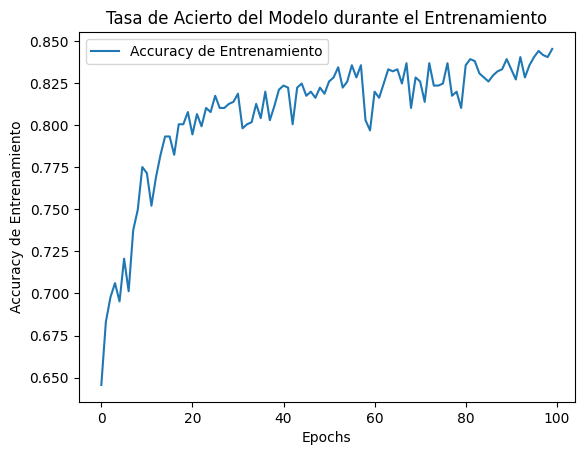

In [195]:
plt.plot(epochs_hist.history['accuracy'])
plt.title("Tasa de Acierto del Modelo durante el Entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("Accuracy de Entrenamiento")
plt.legend(["Accuracy de Entrenamiento"])

In [196]:
X.shape

(827, 7)

In [197]:
print("Accuracy {} %".format(100 * accuracy_score(pred, y_test)))

Accuracy 84.92822966507177 %


In [198]:
cm = confusion_matrix(y_test, pred)

cm

array([[253,  28],
       [ 35, 102]])

<Axes: >

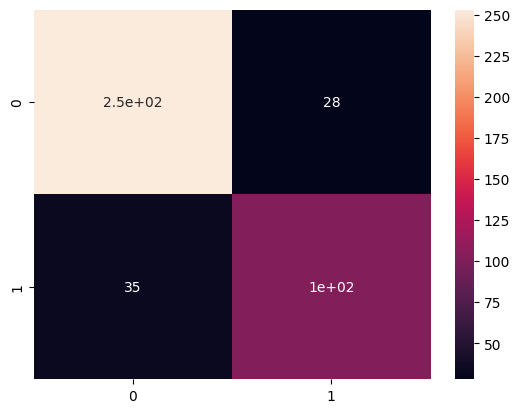

In [199]:
sns.heatmap(cm, annot=True)

In [200]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       281
           1       0.78      0.74      0.76       137

    accuracy                           0.85       418
   macro avg       0.83      0.82      0.83       418
weighted avg       0.85      0.85      0.85       418



5.7. Logistic Regression

In [202]:
model = LogisticRegression(max_iter=1000)
model.fit(X, y)
pred = model.predict(test_df_cleaned)
pred

gender_submission_df["Survived"] = pred

gender_submission_df

gender_submission_df.info()

gender_submission_df.to_csv("/content/drive/My Drive/usac/master/2024 - trimestre 5/data analysis/activities/titanic/SubmissionLogisticRegression2.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [203]:
print("Accuracy {} %".format(100 * accuracy_score(pred, y_test)))

Accuracy 80.622009569378 %


In [204]:
cm = confusion_matrix(y_test, pred)

cm

array([[225,  56],
       [ 25, 112]])

<Axes: >

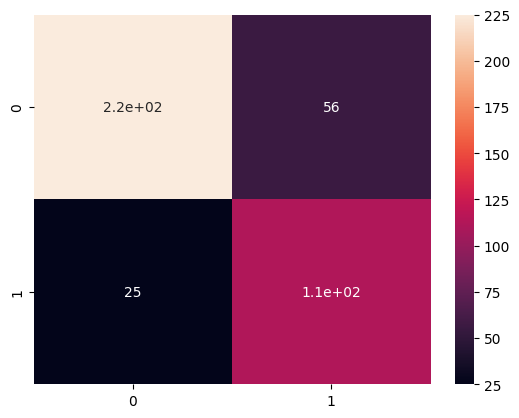

In [205]:
sns.heatmap(cm, annot=True)

In [206]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       281
           1       0.67      0.82      0.73       137

    accuracy                           0.81       418
   macro avg       0.78      0.81      0.79       418
weighted avg       0.82      0.81      0.81       418



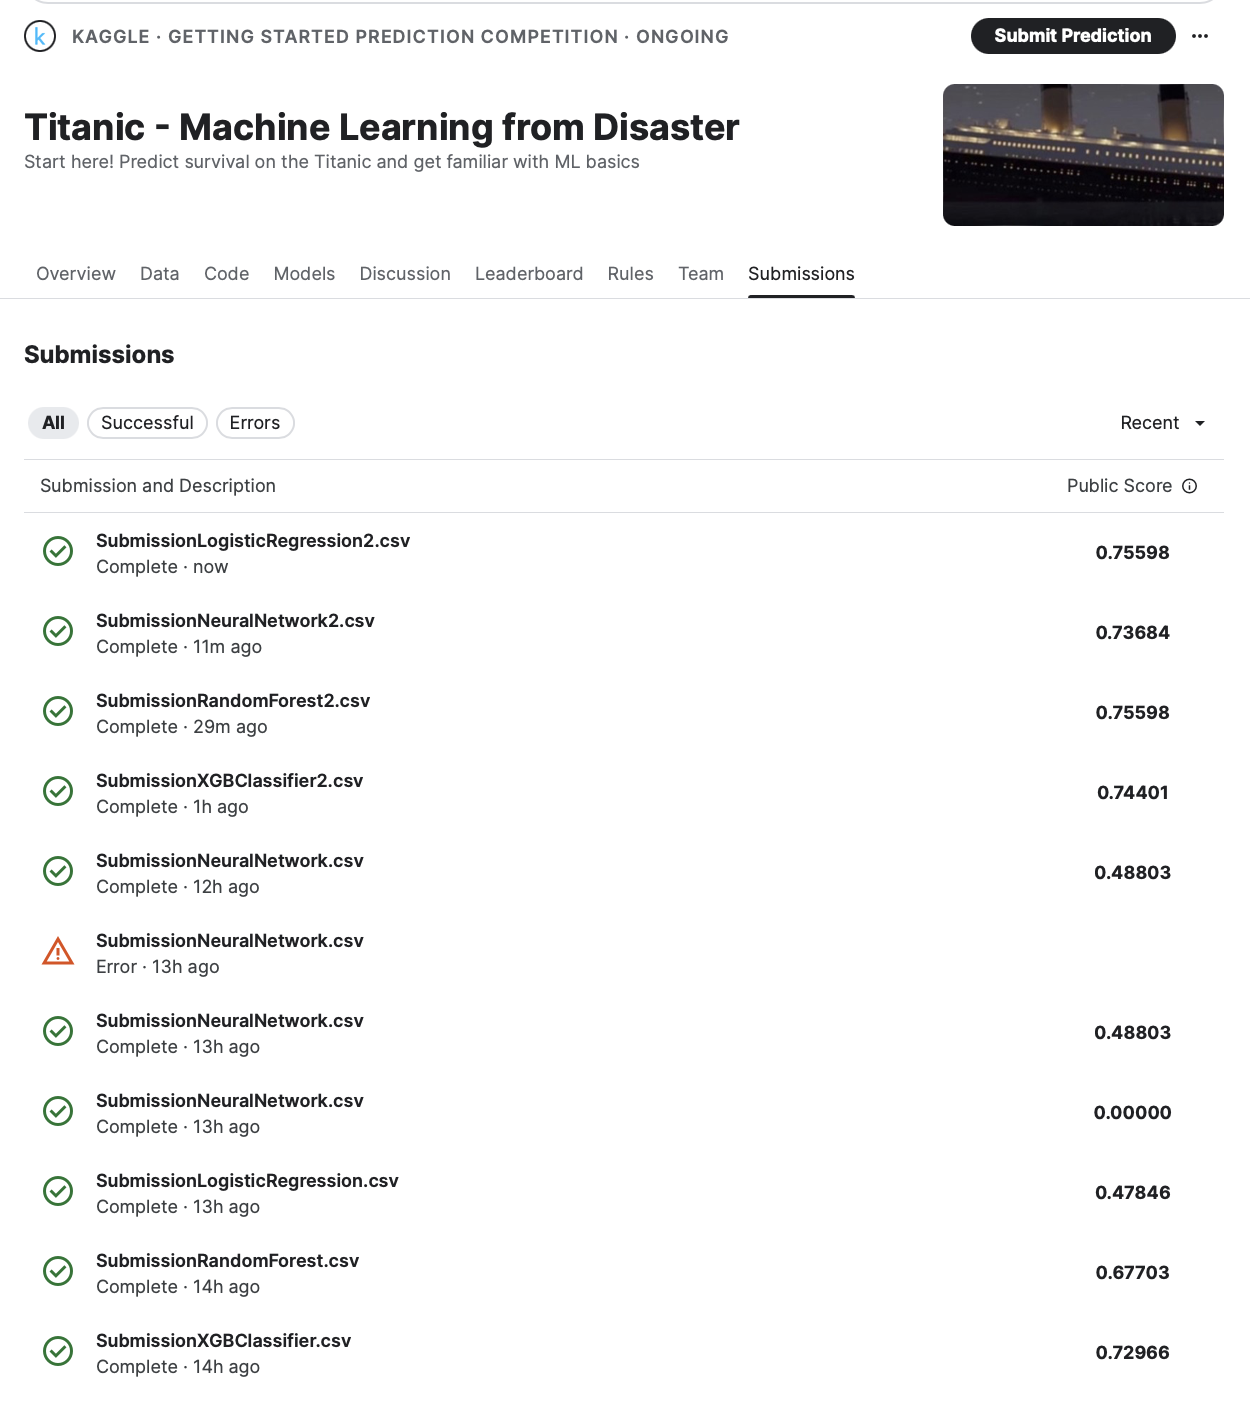